In [1]:
print("Task 1 ML  - B Karthik ")

Task 1 ML  - B Karthik 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Dense,Dropout
from utils import *

In [6]:
df = pd.read_csv(r"C:\Users\Karthi\Desktop\archive (9)\House Price India.csv")

In [7]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [9]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [10]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


<Figure size 2000x800 with 0 Axes>

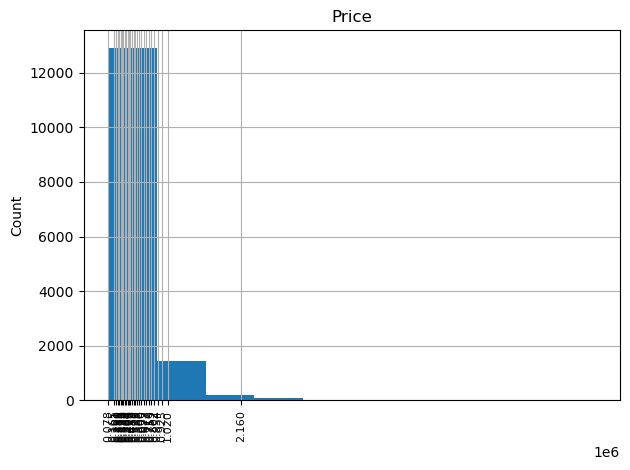

In [91]:
plt.figure(figsize=(20, 8))

df.hist("Price")
unique_prices = sorted(df['Price'].unique())
plt.ylabel("Count")
plt.xticks(unique_prices[::105], rotation=90, ha="center",fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

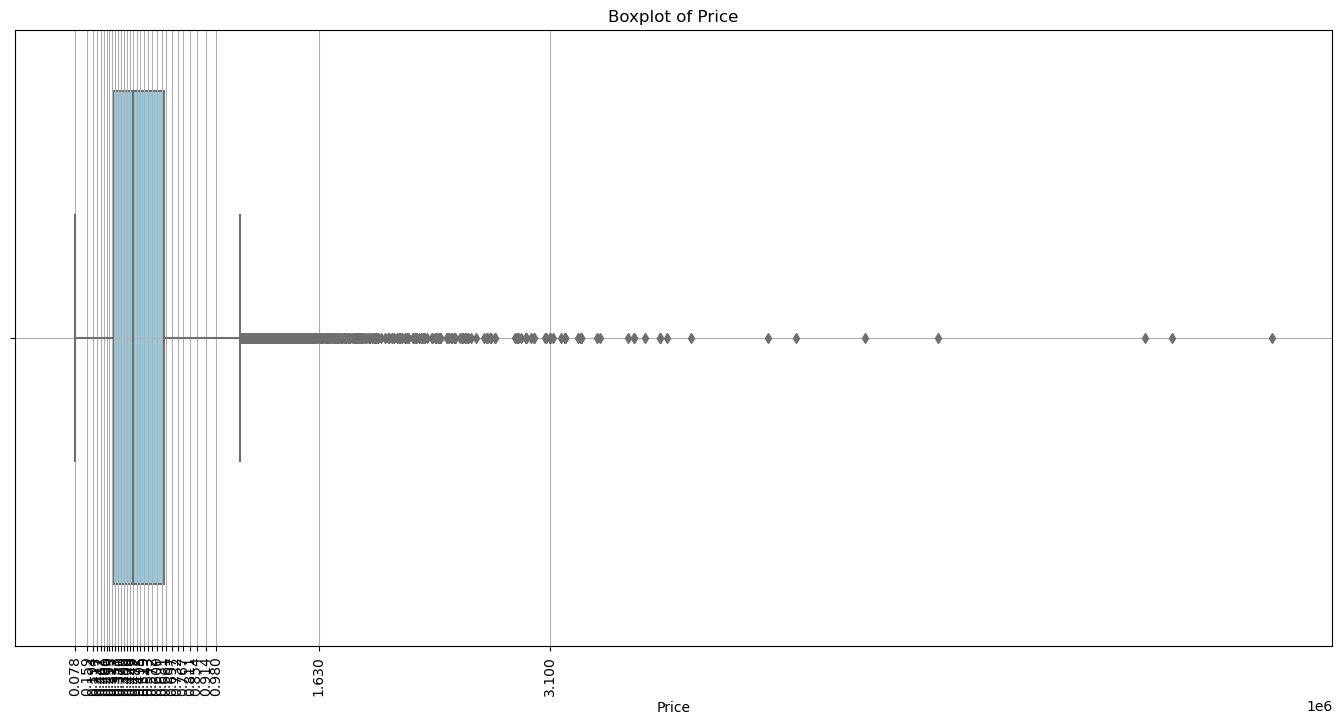

In [94]:
import seaborn as sns
plt.figure(figsize=(17, 8))
sns.boxplot(x=df['Price'], color='skyblue')

plt.title('Boxplot of Price')
plt.xlabel('Price')

unique_prices = sorted(df['Price'].unique())
plt.xticks(unique_prices[::90], rotation=90,ha="center")
plt.grid(True)
plt.show()

In [12]:
print("Dimensions of the data:",df.shape)

Dimensions of the data: (14620, 23)


In [13]:
df_norm = (df-df.mean())/df.std()
df_norm.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,-1.713090,-1.685851,1.726456,0.481102,1.671634,-0.159371,0.921149,-0.08786,4.915958,2.363157,...,-1.692786,-0.218454,-1.575390,0.521025,-1.082556,1.278116,-0.282193,-0.014981,-0.777859,5.009267
1,-1.634534,-1.685851,0.661174,0.481102,0.885229,-0.292547,-0.004368,-0.08786,-0.304212,2.363157,...,-2.099654,-0.218454,-1.522985,0.690452,-0.466958,0.684854,-0.335918,-0.014981,-1.561207,2.342835
2,-1.576338,-1.685851,1.726456,0.805805,0.874457,-0.148031,-0.004368,-0.08786,-0.304212,-0.648205,...,-1.082485,-0.218454,-1.522985,0.671546,-0.452806,1.364935,-0.236143,-1.238546,-1.337393,1.798665
3,-1.318706,-1.685851,0.661174,0.481102,1.305363,0.735891,0.921149,-0.08786,-0.304212,-0.648205,...,1.019664,-0.218454,-1.470581,1.166013,0.587343,1.958198,1.154848,1.208584,1.236463,0.813718
4,-1.268366,-1.685851,-0.404108,-0.168304,0.659004,-0.279361,-0.004368,-0.08786,-0.304212,0.857476,...,-1.421541,-0.218454,-1.418177,0.813342,-0.573095,0.091591,-0.316731,-1.238546,-1.561207,0.723930


In [14]:
pl = df.columns.to_list()
print("Coorelation with 'Price'\n")
for i in (df):
    c = df["Price"].corr(df[i])
    print(i,"   -",df["Price"].corr(df[i]))
    if c<0.33:
        pl.remove(i)

Coorelation with 'Price'

id    - -0.7731138955432798
Date    - -0.027918768673056055
number of bedrooms    - 0.3084601434601234
number of bathrooms    - 0.5317345627058283
living area    - 0.7121694766782508
lot area    - 0.08199199695424976
number of floors    - 0.26273182534592804
waterfront present    - 0.26368655414993764
number of views    - 0.3959730980454371
condition of the house    - 0.0413763763948683
grade of the house    - 0.6718143799433045
Area of the house(excluding basement)    - 0.6152204198678106
Area of the basement    - 0.3302023269339193
Built Year    - 0.050307110901941184
Renovation Year    - 0.13317264760860964
Postal Code    - -0.11590816987158183
Lattitude    - 0.297489980301028
Longitude    - 0.02441401876701381
living_area_renov    - 0.5849244637720502
lot_area_renov    - 0.07553516703462419
Number of schools nearby    - 0.009889890979759114
Distance from the airport    - 0.0038036957177287633
Price    - 0.9999999999999999


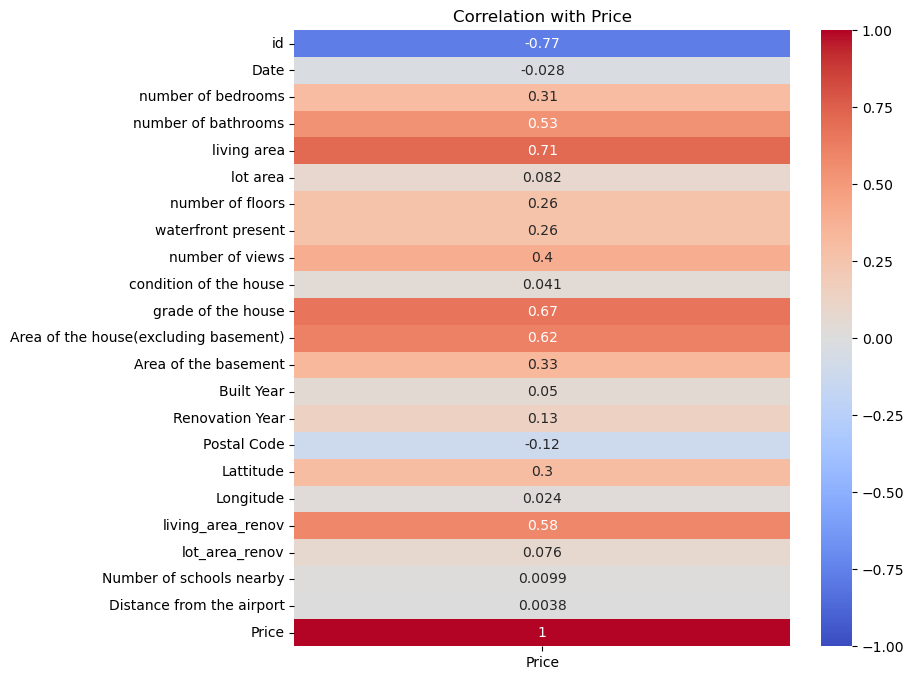

In [15]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation with Price')
plt.show()

In [16]:
print("Required Features:-")
pl.remove("Price")
print("\n",pl)

Required Features:-

 ['number of bathrooms', 'living area', 'number of views', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'living_area_renov']


In [17]:
df_s = df[pl]
df_s.head()

,number of bathrooms,living area,number of views,grade of the house,Area of the house(excluding basement),Area of the basement,living_area_renov
0,2.50,3650,4,10,3370,280,2880
1,2.50,2920,0,8,1910,1010,2470
2,2.75,2910,0,8,2910,0,2940
3,2.50,3310,0,9,3310,0,3350
4,2.00,2710,0,8,1880,830,2060


In [18]:
x = df_s
x.tail()

,number of bathrooms,living area,number of views,grade of the house,Area of the house(excluding basement),Area of the basement,living_area_renov
14615,1.5,1556,0,7,1556,0,2250
14616,2.0,1680,0,7,1680,0,1540
14617,1.0,1070,0,6,1070,0,1130
14618,1.0,1030,0,6,1030,0,1420
14619,1.0,900,0,6,900,0,900


In [19]:
print("Target Variable")
y = df_norm["Price"]
y.head()

Target Variable


0    5.009267
1    2.342835
2    1.798665
3    0.813718
4    0.723930
Name: Price, dtype: float64

In [20]:
x_a = x.values
y_a = y.values

In [21]:
x_train,x_test, y_train,y_test = train_test_split(x_a,y_a, test_size = 0.2 , shuffle = True)

In [22]:
print("X_test shape:",x_test.shape)
print("\nX_train shape:",x_train.shape)

X_test shape: (2924, 7)

X_train shape: (11696, 7)


In [23]:
model = Sequential([
    Dense(10, input_shape = (7,),activation = "relu"),
    Dense(30,activation = "relu"),
    Dense(8,activation = "relu"),
    Dense(1)
])

In [24]:
model.compile(loss = "mse", optimizer = "adadelta")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 8)                 248       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 667 (2.61 KB)
Trainable params: 667 (2.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
y_pred = model.predict(x_test)

92/92 [==============================] - 5s 5ms/step


In [27]:
train_history = model.fit(
    x_train,y_train,
    validation_data = (x_test,y_test),
    epochs = 700
)

Epoch 1/700

366/366 [==============================] - 4s 3ms/step - loss: 29864.7148 - val_loss: 26040.9766
Epoch 2/700
366/366 [==============================] - 1s 3ms/step - loss: 23137.5312 - val_loss: 19583.2422
Epoch 3/700
366/366 [==============================] - 1s 3ms/step - loss: 17090.0527 - val_loss: 14173.2188
Epoch 4/700
366/366 [==============================] - 1s 3ms/step - loss: 12246.1406 - val_loss: 10133.1729
Epoch 5/700
366/366 [==============================] - 1s 3ms/step - loss: 8760.8926 - val_loss: 7404.3706
Epoch 6/700
366/366 [==============================] - 1s 3ms/step - loss: 6472.6606 - val_loss: 5787.2847
Epoch 7/700
366/366 [==============================] - 1s 3ms/step - loss: 5148.0322 - val_loss: 4881.4771
Epoch 8/700
366/366 [==============================] - 1s 3ms/step - loss: 4370.9365 - val_loss: 4351.0713
Epoch 9/700
366/366 [==============================] - 1s 3ms/step - loss: 3891.7610 - val_loss: 3991.6118
Epoch 10/700
366/366 [======

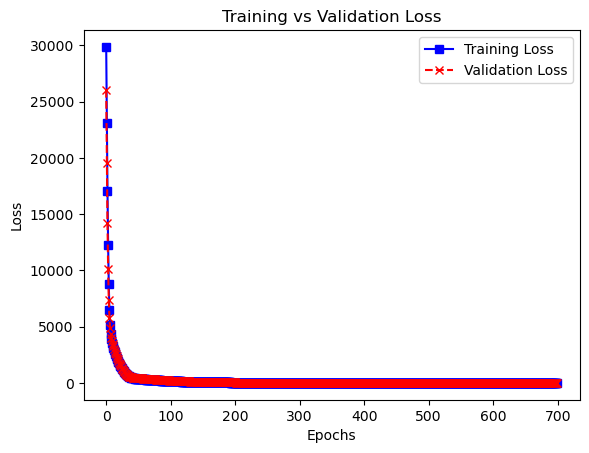

In [28]:
plt.plot(train_history.history['loss'], label='Training Loss', linestyle='-', marker='s', color='blue')
plt.plot(train_history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x', color='red')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
pred_t = model.predict(x_test)

92/92 [==============================] - 0s 2ms/step


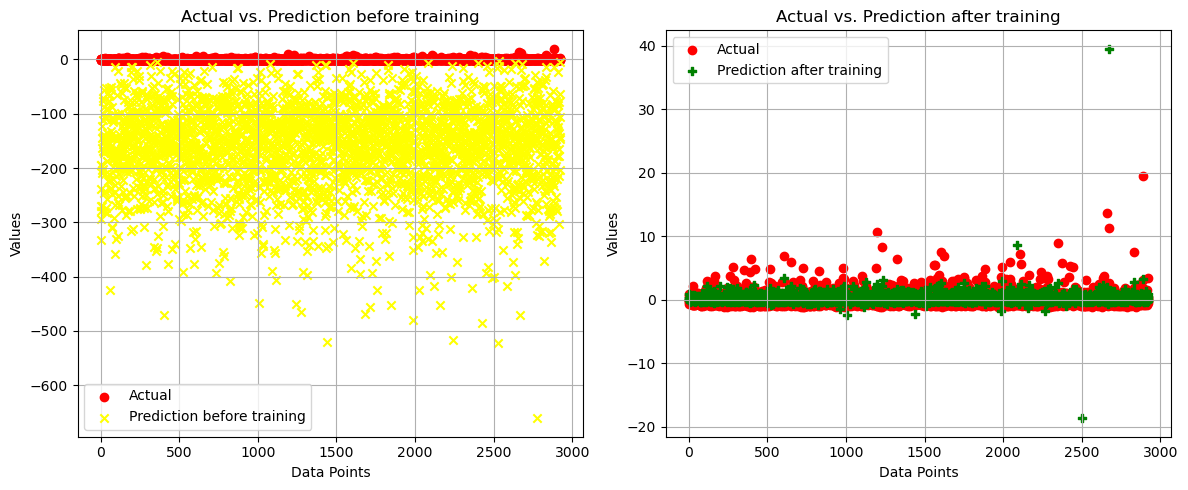

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Actual vs. Prediction before training
axes[0].scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='red')
axes[0].scatter(range(len(y_pred)), y_pred, label='Prediction before training', marker='x', color='yellow')
axes[0].set_title('Actual vs. Prediction before training')
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Values')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for Actual vs. Prediction after training
axes[1].scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='red')
axes[1].scatter(range(len(pred_t)), pred_t, label='Prediction after training', marker='P', color='green')
axes[1].set_title('Actual vs. Prediction after training')
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Values')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [31]:
y_mean = df["Price"].mean()
y_std = df["Price"].std()

def actual(pred):
    return int(pred*y_std+y_mean)
print("Actual Price(Without normalization):",actual(0.723930))

Actual Price(Without normalization): 804999


In [32]:
print(actual(-1.069109))

146000


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse_before_training = mean_squared_error(y_test, y_pred)
mse_after_training = mean_squared_error(y_test, pred_t)

mae_before_training = mean_absolute_error(y_test, y_pred)
mae_after_training = mean_absolute_error(y_test, pred_t)

# R-squared (R2)
r2_before_training = r2_score(y_test, y_pred)
r2_after_training = r2_score(y_test, pred_t)

# Print the results
print(f'Mean Squared Error (MSE) before training: {mse_before_training}')
print(f'Mean Squared Error (MSE) AFTER training: {mse_after_training}')
print('\n')
print(f'Mean Absolute Error (MAE) before training: {mae_before_training}')
print(f'Mean Absolute Error (MAE) AFTER training: {mae_after_training}')
print('\n')
print(f'R-squared (R2) before training: {r2_before_training}')
print(f'R-squared (R2) AFTER training: {r2_after_training}')

Mean Squared Error (MSE) before training: 32773.18420471122
Mean Squared Error (MSE) AFTER training: 1.2355108565012018


Mean Absolute Error (MAE) before training: 163.440165133155
Mean Absolute Error (MAE) AFTER training: 0.6105854815839362


R-squared (R2) before training: -25856.23160277495
R-squared (R2) AFTER training: 0.025212497975647397


In [34]:
print("--Enter Details of the House to Predict--")

--Enter Details of the House to Predict--


In [35]:
b = int(input("Enter Number of Bathrooms:"))
l = int(input("Enter Living Area:"))
g = int(input("Enter Grade of the house:"))
n = int(input("Enter Number of Views:"))
ba = int(input("Enter Area of Basement"))
a = int(input("Enter Area of the house - excluding basement:"))
r = int(input("Enter Living Area_renov:"))

Enter Number of Bathrooms:3
Enter Living Area:2500
Enter Grade of the house:9
Enter Number of Views:0
Enter Area of Basement200
Enter Area of the house - excluding basement:2300
Enter Living Area_renov:2000


In [38]:
import numpy as np

x_new = np.array([[b,l,g,n,ba,a,r]])
x_new_normalized = (x_new - x_new.mean()) / x_new.std()

predictions_normalized = model.predict(x_new_normalized)

1/1 [==============================] - 0s 27ms/step


In [39]:
prediction = predictions_normalized * y_std + y_mean
print("PREDICTED PRICE:", round(float(prediction),1))

PREDICTED PRICE: 375759.8
